In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

#- https://stackoverflow.com/questions/72794860/modin-modulenotfounderror-no-module-named-ray
!pip install modin[ray]
!pip install gym
!pip install gymnasium
# !pip install gym[atari,accept-rom-license]
# !pip install atari_py
import os

import ray
from ray.rllib.algorithms.dqn import DQN, DQNConfig

import torch
from torch import nn
import gym as gym
import torch.nn.functional as F
from ray.rllib.algorithms.ppo import PPOConfig
from ray import air
from ray import tune
import ray
from ray.tune.analysis import ExperimentAnalysis
import matplotlib.pyplot as plt
!pip install "gymnasium[atari, accept-rom-license]"
import gymnasium as gym
# env = gym.make("ALE/Breakout-v5")


config = DQNConfig().environment(env = "ALE/Breakout-v5").resources(num_gpus = 1).training(lr = 0.0001, train_batch_size = 128)
config = config.to_dict()

if not ray.is_initialized():
    ray.init()





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 550.4/550.4 kB 45.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does 

2024-05-12 05:06:35,361	WARNING compression.py:16 -- lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.7 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=68a8d82d3fc51601c16eda03e5baa029b3cbebf71b6c3ebe3553aa6e8bc83653
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
2024-05-12 05:06:55,916	INFO worker.py:1740 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


In [ ]:
# !rm -rf /content/drive/MyDrive/Reinforcement Learning/task_9_10_11/DQN_Atari_1_Simple/DQN_<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<AtariEnv instance>>>>>_75417_00000_0_2024-05-11_23-01-54
# !rm -rf /content/drive/MyDrive/Reinforcement Learning/task_9_10_11/DQN_Atari_1_Simple/DQN_<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<AtariEnv instance>>>>>_d74be_00000_0_2024-05-11_22-57-28

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# tuner_dqn = tune.run(
#     "DQN",
#     name = "DQN_Atari_8_Simple",
#     stop = {"timesteps_total": 20000 if not os.environ.get("CI") else 20000},
#     checkpoint_freq = 10,
#     config = config,
#     checkpoint_at_end = True,
#     local_dir = "/content/drive/MyDrive/Reinforcement Learning/Task 9-11",
#     metric = "episode_reward_mean",
#     mode = "max"
#     )

/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:583: UserWarning: The `local_dir` argument is deprecated and will be removed. This will pass-through to set the `storage_path` for now but will raise an error in the future. You should only set the `storage_path` from now on.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:673: DeprecationWarning: checkpoint_freq is deprecated and will be removed. use checkpoint_config.checkpoint_frequency instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:680: DeprecationWarning: checkpoint_at_end is deprecated and will be removed. use checkpoint_config.checkpoint_at_end instead.
  warnings.warn(
2024-05-12 00:31:39,156	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


+--------------------------------------------------------+
| Configuration for experiment     DQN_Atari_8_Simple    |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 1                     |
+--------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/Reinforcement Learning/Task 9-11/DQN_Atari_8_Simple

Trial status: 1 PENDING
Current time: 2024-05-12 00:31:39. Total running time: 0s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
+--------------------------------------------+
| Trial name                        status   |
+--------------------------------------------+
| DQN_ALE_Breakout-v5_ff4f7_00000   PENDING  |
+--------------------------------------------+


(pid=5691) lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
(pid=5691) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=5691)   if (distutils.version.LooseVersion(tf.__version__) <
(DQN pid=5691) 2024-05-12 00:31:48,033	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(DQN pid=5691) 2024-05-12 00:31:48,034	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(DQN pid=5691) A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
(DQN pid=5691


Trial DQN_ALE_Breakout-v5_ff4f7_00000 started with configuration:
+---------------------------------------------------------------------------+
| Trial DQN_ALE_Breakout-v5_ff4f7_00000 config                              |
+---------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                |
| _disable_action_flattening                                          False |
| _disable_execution_plan_api                                            -1 |
| _disable_initialize_loss_from_dummy_batch                           False |
| _disable_preprocessor_api                                           False |
| _enable_rl_module_api                                                  -1 |
| _env_to_module_connector                                                  |
| _evaluation_parallel_to_training_wo_thread                          False |
| _fake_gpus                                                          False

(DQN pid=5691) Install gputil for GPU system monitoring.
(DQN pid=5691) 2024-05-12 00:31:50,718	WARNING replay_buffer.py:60 -- Estimated max memory usage for replay buffer is 2.8251 GB (50000.0 batches of size 1, 56502 bytes each), available system memory is 13.609447424 GB



Trial DQN_ALE_Breakout-v5_ff4f7_00000 finished iteration 1 at 2024-05-12 00:31:56. Total running time: 17s
+--------------------------------------------------------+
| Trial DQN_ALE_Breakout-v5_ff4f7_00000 result           |
+--------------------------------------------------------+
| env_runner_results/episode_len_mean              211.2 |
| env_runner_results/episode_return_mean               2 |
| num_env_steps_sampled_lifetime                    1000 |
+--------------------------------------------------------+


(DQN pid=5691) 2024-05-12 00:31:56,810	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



Trial status: 1 RUNNING
Current time: 2024-05-12 00:32:09. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
Current best trial: ff4f7_00000 with episode_reward_mean=2.0 and params={'extra_python_environs_for_driver': {}, 'extra_python_environs_for_worker': {}, 'num_gpus': 1, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0, '_fake_gpus': False, 'num_learner_workers': 0, 'num_gpus_per_learner_worker': 0, 'num_cpus_per_learner_worker': 1, 'local_gpu_idx': 0, 'custom_resources_per_worker': {}, 'placement_strategy': 'PACK', 'eager_tracing': True, 'eager_max_retraces': 20, 'tf_session_args': {'intra_op_parallelism_threads': 2, 'inter_op_parallelism_threads': 2, 'gpu_options': {'allow_growth': True}, 'log_device_placement': False, 'device_count': {'CPU': 1}, 'allow_soft_placement': True}, 'local_tf_session_args': {'intra_op_parallelism_threads': 8, 'inter_op_parallelism_threads': 8}, 'torch_compile_learner': False, 'torch_compile_learner

(DQN pid=5691) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/Reinforcement Learning/Task 9-11/DQN_Atari_8_Simple/DQN_ALE_Breakout-v5_ff4f7_00000_0_2024-05-12_00-31-39/checkpoint_000000)



Trial status: 1 RUNNING
Current time: 2024-05-12 00:51:10. Total running time: 19min 31s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:T4)
Current best trial: ff4f7_00000 with episode_reward_mean=1.5423728813559323 and params={'extra_python_environs_for_driver': {}, 'extra_python_environs_for_worker': {}, 'num_gpus': 1, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0, '_fake_gpus': False, 'num_learner_workers': 0, 'num_gpus_per_learner_worker': 0, 'num_cpus_per_learner_worker': 1, 'local_gpu_idx': 0, 'custom_resources_per_worker': {}, 'placement_strategy': 'PACK', 'eager_tracing': True, 'eager_max_retraces': 20, 'tf_session_args': {'intra_op_parallelism_threads': 2, 'inter_op_parallelism_threads': 2, 'gpu_options': {'allow_growth': True}, 'log_device_placement': False, 'device_count': {'CPU': 1}, 'allow_soft_placement': True}, 'local_tf_session_args': {'intra_op_parallelism_threads': 8, 'inter_op_parallelism_threads': 8}, 'torch_compile_learner': False, '

(DQN pid=5691) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/Reinforcement Learning/Task 9-11/DQN_Atari_8_Simple/DQN_ALE_Breakout-v5_ff4f7_00000_0_2024-05-12_00-31-39/checkpoint_000001)
2024-05-12 01:12:06,615	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/content/drive/MyDrive/Reinforcement Learning/Task 9-11/DQN_Atari_8_Simple' in 0.0694s.



Trial DQN_ALE_Breakout-v5_ff4f7_00000 finished iteration 20 at 2024-05-12 01:12:06. Total running time: 40min 27s
+---------------------------------------------------------+
| Trial DQN_ALE_Breakout-v5_ff4f7_00000 result            |
+---------------------------------------------------------+
| env_runner_results/episode_len_mean              227.98 |
| env_runner_results/episode_return_mean             2.57 |
| num_env_steps_sampled_lifetime                    20000 |
+---------------------------------------------------------+
Trial DQN_ALE_Breakout-v5_ff4f7_00000 saved a checkpoint for iteration 20 at: (local)/content/drive/MyDrive/Reinforcement Learning/Task 9-11/DQN_Atari_8_Simple/DQN_ALE_Breakout-v5_ff4f7_00000_0_2024-05-12_00-31-39/checkpoint_000001

Trial DQN_ALE_Breakout-v5_ff4f7_00000 completed after 20 iterations at 2024-05-12 01:12:06. Total running time: 40min 27s

Trial status: 1 TERMINATED
Current time: 2024-05-12 01:12:06. Total running time: 40min 27s
Logical resource 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/Task 9-11/DQN_Atari_8_Simple/DQN_ALE_Breakout-v5_ff4f7_00000_0_2024-05-12_00-31-39/progress.csv")

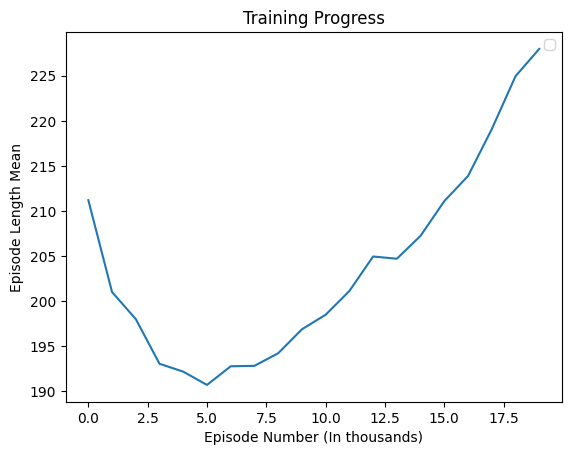

In [4]:
plt.plot(data["episode_len_mean"])
plt.title('Training Progress')
plt.xlabel('Episode Number (In thousands)')
plt.ylabel('Episode Length Mean')
plt.legend()
plt.show()

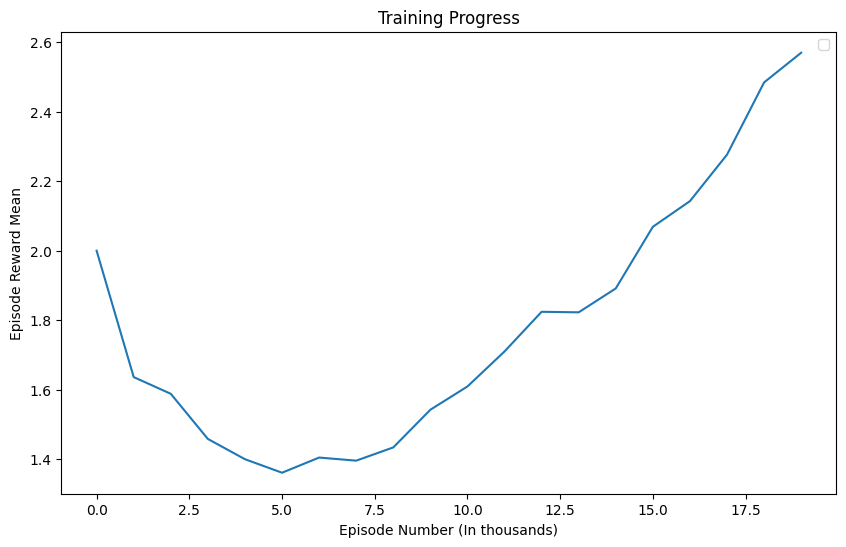

In [5]:


plt.figure(figsize=(10,6))

plt.plot(data["episode_reward_mean"])
plt.title('Training Progress')
plt.xlabel('Episode Number (In thousands)')
plt.ylabel('Episode Reward Mean')
plt.legend()
plt.show()

In [6]:
import torch
from torch import nn
import gym as gym
# pip install modin[ray]  you may want to use this too. from:
#- https://stackoverflow.com/questions/72794860/modin-modulenotfounderror-no-module-named-ray
import torch.nn.functional as F
from ray.rllib.algorithms.ppo import PPOConfig
from ray import air
from ray import tune
import ray
from ray.tune.analysis import ExperimentAnalysis
import matplotlib.pyplot as plt


In [9]:
config = PPOConfig()
config = config.training(gamma=0.9, lr=0.01, kl_coeff=0.3,
    train_batch_size=128)
config = config.resources(num_gpus=1)
config = config.env_runners(num_env_runners=1)

algo = config.build(env="CartPole-v1")
algo.train()

2024-05-12 05:08:04,466	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(pid=5483) lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
(pid=5483) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=5483)   if (distutils.version.LooseVersion(tf.__version__) <
(RolloutWorker pid=5483) /usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.single_observation_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.single_observation_space` for environment variables or `env.get_wrapper_a

{'custom_metrics': {},
 'episode_media': {},
 'info': {'learner': {'default_policy': {'custom_metrics': {},
    'learner_stats': {'cur_kl_coeff': 0.30000000000000004,
     'cur_lr': 0.010000000000000002,
     'total_loss': 4.8717338403066,
     'policy_loss': 0.006770668551325798,
     'vf_loss': 4.815923301378886,
     'vf_explained_var': -0.9367950220902761,
     'kl': 0.16346631972119213,
     'entropy': 0.5835456997156143,
     'entropy_coeff': 0.0},
    'model': {},
    'num_grad_updates_lifetime': 15.5,
    'diff_num_grad_updates_vs_sampler_policy': 14.5}},
  'num_env_steps_sampled': 128,
  'num_env_steps_trained': 128,
  'num_agent_steps_sampled': 128,
  'num_agent_steps_trained': 128},
 'sampler_results': {'episode_reward_max': 35.0,
  'episode_reward_min': 11.0,
  'episode_reward_mean': 21.0,
  'episode_len_mean': 21.0,
  'episode_media': {},
  'episodes_this_iter': 6,
  'episodes_timesteps_total': 126,
  'policy_reward_min': {},
  'policy_reward_max': {},
  'policy_reward_mea

In [10]:
# https://stackoverflow.com/questions/76213819/attributeerror-module-ray-rllib-algorithms-ppo-has-no-attribute-default-conf
# https://docs.ray.io/en/latest/tune/examples/pbt_ppo_example.html
import os
from ray import train
stopping_criteria = {"training_iteration": 100, "episode_reward_mean": 300}

tuner = tune.Tuner(
    "PPO",
    tune_config=tune.TuneConfig(
        metric="episode_reward_mean",
        mode="max",
        num_samples=1
    ),
param_space={
    "env": "CartPole-v1",
    "kl_coeff": 1.0,
    "num_workers": 4,
    "num_cpus": 1,
    "num_gpus": 0,
    "model": {"free_log_std": True},
    "lambda": 0.95,
    "clip_param": 0.2,
    "lr": 1e-4,
    "num_sgd_iter": 10,
    "sgd_minibatch_size": 512,
    "train_batch_size": 20000,
    },
    run_config=train.RunConfig(stop=stopping_criteria,
                               local_dir= "/content/drive/MyDrive/Reinforcement Learning/Task 9-11"),
)
results = tuner.fit()


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/usr/local/lib/python3.10/dist-packages/ray/tune/tune.py:583: UserWarning: The `local_dir` argument is deprecated and will be removed. This will pass-through to set the `storage_path` for now but will raise an error in the future. You should only set the `storage_path` from now on.
  warnings.warn(
2024-05-12 05:08:17,409	WARNING callback.py:136 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of Tensorboard

+------------------------------------------------------------+
| Configuration for experiment     PPO_2024-05-12_05-08-17   |
+------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator     |
| Scheduler                        FIFOScheduler             |
| Number of trials                 1                         |
+------------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/Reinforcement Learning/Task 9-11/PPO_2024-05-12_05-08-17

Trial status: 1 PENDING
Current time: 2024-05-12 05:08:17. Total running time: 0s
Logical resource usage: 0/12 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:A100)
+----------------------------------------+
| Trial name                    status   |
+----------------------------------------+
| PPO_CartPole-v1_a4a3f_00000   PENDING  |
+----------------------------------------+


(pid=5589) lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`.
(pid=5589) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
(pid=5589)   if (distutils.version.LooseVersion(tf.__version__) <
(PPO pid=5589) 2024-05-12 05:08:24,561	WARNING deprecation.py:50 -- DeprecationWarning: `WorkerSet(num_workers=... OR local_worker=...)` has been deprecated. Use `EnvRunnerGroup(num_env_runners=... AND local_env_runner=...)` instead. This will raise an error in the future!
(PPO pid=5589) 2024-05-12 05:08:24,561	WARNING deprecation.py:50 -- DeprecationWarning: `max_num_worker_restarts` has been deprecated. Use `AlgorithmConfig.max_num_env_runner_restarts` instead. This will raise an error in the future!
(pid=5669) lz4 not available, disabling sample compression. This will significantly imp


Trial PPO_CartPole-v1_a4a3f_00000 started with configuration:
+----------------------------------------------------------+
| Trial PPO_CartPole-v1_a4a3f_00000 config                 |
+----------------------------------------------------------+
| clip_param                                           0.2 |
| env                                          CartPole-v1 |
| kl_coeff                                              1. |
| lambda                                              0.95 |
| lr                                                0.0001 |
| model/free_log_std                                  True |
| num_cpus                                               1 |
| num_gpus                                               0 |
| num_sgd_iter                                          10 |
| num_workers                                            4 |
| sgd_minibatch_size                                   512 |
| train_batch_size                                   20000 |
+---------------------

(PPO pid=5589) 2024-05-12 05:08:43,227	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!
(pid=5667) lz4 not available, disabling sample compression. This will significantly impact RLlib performance. To install lz4, run `pip install lz4`. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(pid=5667) /usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead. [repeated 2x across cluster]
(pid=5667)   if (distutils.version.LooseVersion(tf.__version__) < [repeated 2x across cluster]
(RolloutWorker pid=5667) /usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: U


Trial status: 1 RUNNING
Current time: 2024-05-12 05:08:47. Total running time: 30s
Logical resource usage: 5.0/12 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:A100)
+----------------------------------------+
| Trial name                    status   |
+----------------------------------------+
| PPO_CartPole-v1_a4a3f_00000   RUNNING  |
+----------------------------------------+
Trial status: 1 RUNNING
Current time: 2024-05-12 05:09:17. Total running time: 1min 0s
Logical resource usage: 5.0/12 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:A100)
Current best trial: a4a3f_00000 with episode_reward_mean=56.09887005649718 and params={'extra_python_environs_for_driver': {}, 'extra_python_environs_for_worker': {}, 'num_gpus': 0, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0, '_fake_gpus': False, 'num_learner_workers': 0, 'num_gpus_per_learner_worker': 0, 'num_cpus_per_learner_worker': 1, 'local_gpu_idx': 0, 'custom_resources_per_worker': {}, 'placement_strategy': 'PACK', 'eager_tracing': True, '

(PPO pid=5589) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/content/drive/MyDrive/Reinforcement Learning/Task 9-11/PPO_2024-05-12_05-08-17/PPO_CartPole-v1_a4a3f_00000_0_2024-05-12_05-08-17/checkpoint_000000)
2024-05-12 05:10:23,538	INFO tune.py:1007 -- Wrote the latest version of all result files and experiment state to '/content/drive/MyDrive/Reinforcement Learning/Task 9-11/PPO_2024-05-12_05-08-17' in 0.0487s.



Trial PPO_CartPole-v1_a4a3f_00000 completed after 8 iterations at 2024-05-12 05:10:23. Total running time: 2min 6s
+-----------------------------------------------------+
| Trial PPO_CartPole-v1_a4a3f_00000 result            |
+-----------------------------------------------------+
| env_runner_results/episode_len_mean          323.82 |
| env_runner_results/episode_return_mean       323.82 |
| num_env_steps_sampled_lifetime               160000 |
+-----------------------------------------------------+

Trial status: 1 TERMINATED
Current time: 2024-05-12 05:10:23. Total running time: 2min 6s
Logical resource usage: 5.0/12 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:A100)
Current best trial: a4a3f_00000 with episode_reward_mean=323.82 and params={'extra_python_environs_for_driver': {}, 'extra_python_environs_for_worker': {}, 'num_gpus': 0, 'num_cpus_per_worker': 1, 'num_gpus_per_worker': 0, '_fake_gpus': False, 'num_learner_workers': 0, 'num_gpus_per_learner_worker': 0, 'num_cpus_per_learn

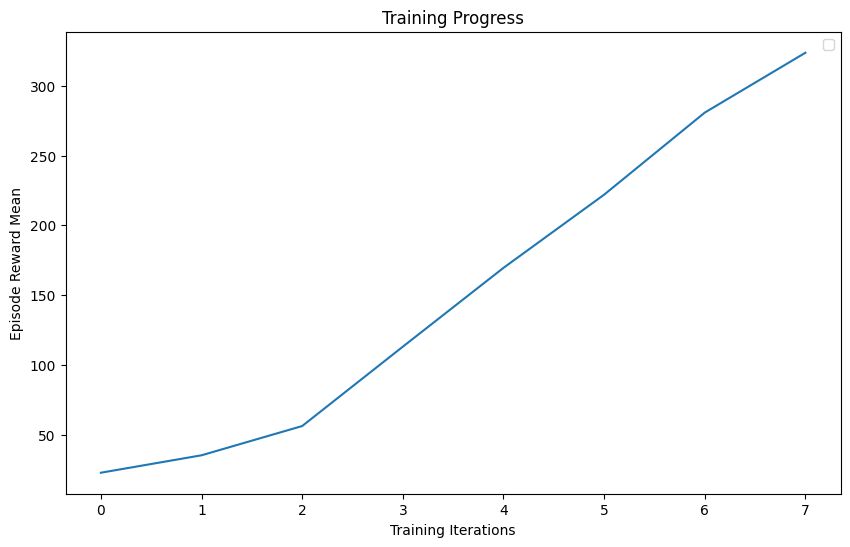

In [11]:
ppo_output = pd.read_csv("/content/drive/MyDrive/Reinforcement Learning/Task 9-11/PPO_2024-05-12_05-08-17/PPO_CartPole-v1_a4a3f_00000_0_2024-05-12_05-08-17/progress.csv")
plt.figure(figsize=(10,6))

plt.plot(ppo_output["episode_reward_mean"])
plt.title('Training Progress')
plt.xlabel('Training Iterations')
plt.ylabel('Episode Reward Mean')
plt.legend()
plt.show()

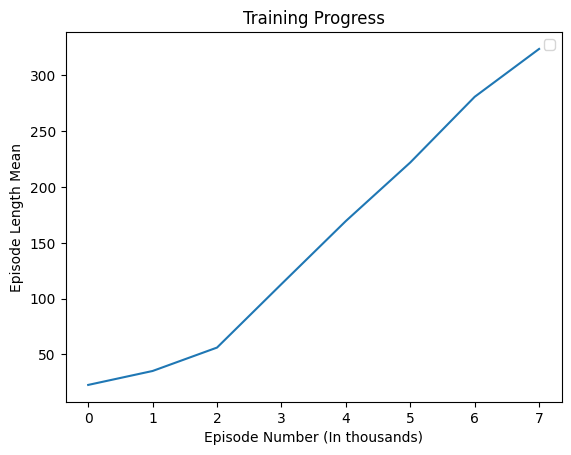

In [16]:
plt.plot(ppo_output["episode_len_mean"])
plt.title('Training Progress')
plt.xlabel('Episode Number (In thousands)')
plt.ylabel('Episode Length Mean')
plt.legend()
plt.show()